# **Exploratory data analysis**

---



#### Created by *Amirhossein Nazeri*

In [91]:
# import essential packages:

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [146]:
# Script that parses csv file into dataframe

df = pd.read_csv("/content/drive/MyDrive/Job internship/TRAIN_SET_2022.csv")
df_EDA = df.copy()
print('size of dataset (records, fields):', df_EDA.shape)
df_EDA.head(3)

size of dataset (records, fields): (15673, 28)


,RESTAURANT_SERIAL_NUMBER,RESTAURANT_PERMIT_NUMBER,RESTAURANT_NAME,RESTAURANT_LOCATION,RESTAURANT_CATEGORY,ADDRESS,CITY,STATE,ZIP,CURRENT_DEMERITS,...,RECORD_UPDATED,LAT_LONG_RAW,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW
0,DA1117270,PR0004527,SANDS EXPO HALL B2 CONCESSION,SANDS EXPO & CONVENTION CENTER,Snack Bar,201 E Sands Ave,Las Vegas,Nevada,89169-2617,0.0,...,1/6/2015 16:34,"(36.1221442, 115.1652749)",204.0,215.0,302.0,Critical,Major,Imminent Health Hazard,4,0
1,DA1014948,PR0024221,THAI NOODLES CAFE - RESTAURANT,THAI NOODLES CAFE,Restaurant,6710 W CHEYENNE Ave,Las Vegas,Nevada,89108-4588,3.0,...,2/21/2013 22:26,"(36.218691, 115.242913)",214.0,216.0,229.0,Major,Major,Non-Major,5,0
2,DA0861994,PR0019017,SANTA FE SPORTS BOOK GRILL,Santa Fe Station Hotel & Casino,Restaurant,4949 N Rancho Dr,Las Vegas,Nevada,89130-3505,8.0,...,4/6/2015 9:00,"(36.2498922, 115.2441383)",202.0,215.0,233.0,Critical,Major,Non-Major,3,1


*   First, I take a look at data types of the dataset features by using `.dtypes` function. 







In [16]:
df_EDA.dtypes

RESTAURANT_SERIAL_NUMBER             object
RESTAURANT_PERMIT_NUMBER             object
RESTAURANT_NAME                      object
RESTAURANT_LOCATION                  object
RESTAURANT_CATEGORY                  object
ADDRESS                              object
CITY                                 object
STATE                                object
ZIP                                  object
CURRENT_DEMERITS                    float64
CURRENT_GRADE                        object
EMPLOYEE_COUNT                      float64
MEDIAN_EMPLOYEE_AGE                  object
MEDIAN_EMPLOYEE_TENURE              float64
INSPECTION_TIME                      object
INSPECTION_TYPE                      object
INSPECTION_DEMERITS                  object
VIOLATIONS_RAW                       object
RECORD_UPDATED                       object
LAT_LONG_RAW                         object
FIRST_VIOLATION                     float64
SECOND_VIOLATION                    float64
THIRD_VIOLATION                 

As we see, the data format of some fields/feautres like `MEDIAN_EMPLOYEE_AGE` and `NUMBER_OF_VIOLATIONS` are coded wrong. So we need to modify them later in *data preprocessing* part. 

*  ### Nan values:
I check the number of Nan values in each column. If a column has too many Nan values, I can delete it right off. However, this didn't happen for this dataset.
Number of Nan values in associated with each column:

In [17]:
df_EDA.isnull().sum()

RESTAURANT_SERIAL_NUMBER              0
RESTAURANT_PERMIT_NUMBER              0
RESTAURANT_NAME                      65
RESTAURANT_LOCATION                 200
RESTAURANT_CATEGORY                 130
ADDRESS                              70
CITY                                236
STATE                               209
ZIP                                  59
CURRENT_DEMERITS                    216
CURRENT_GRADE                       305
EMPLOYEE_COUNT                       93
MEDIAN_EMPLOYEE_AGE                  34
MEDIAN_EMPLOYEE_TENURE              297
INSPECTION_TIME                     183
INSPECTION_TYPE                     221
INSPECTION_DEMERITS                 254
VIOLATIONS_RAW                      165
RECORD_UPDATED                      119
LAT_LONG_RAW                         15
FIRST_VIOLATION                     212
SECOND_VIOLATION                     85
THIRD_VIOLATION                      61
FIRST_VIOLATION_TYPE                146
SECOND_VIOLATION_TYPE               267


In data preprocessing section, I will take care of missing values, after concluding final useful features for machine learning modeling. 

*  ### Categorical features distribution:

---

To get an insight about unique values, abnormal values, and outliers of *categorical fields*, I used `.value_counts()` to count the unique values frequency.


In [18]:
selected_cols =['RESTAURANT_CATEGORY' , 'CITY' , 'STATE' , 'CURRENT_GRADE', 'INSPECTION_TYPE' ,
                    'FIRST_VIOLATION_TYPE', 'SECOND_VIOLATION_TYPE', 'THIRD_VIOLATION_TYPE', 'NEXT_INSPECTION_GRADE_C_OR_BELOW' ]

for i in selected_cols:
    print(df_EDA[i].value_counts())

Restaurant                     9316
Bar / Tavern                   2358
Snack Bar                      1285
Special Kitchen                1158
Buffet                          223
Portable Unit                   199
Pantry                          165
Meat/Poultry/Seafood            140
Food Trucks / Mobile Vendor      99
Caterer                          71
Banquet Kitchen                  65
Kitchen Bakery                   60
Bakery Sales                     47
Garde Manger                     47
Vegetable Prep                   44
Produce Market                   33
Institutional Food Service       32
Concessions                      29
Confection                       26
Elementary School Kitchen        20
Grocery Store Sampling           19
Banquet Support                  16
Portable Bar                     15
Childcare Kitchens               15
Barbeque                         14
Gastropub                         9
Gas Station                       8
Main Kitchen                

As we see there are many outliers associated with each column, later we have to remove them. 

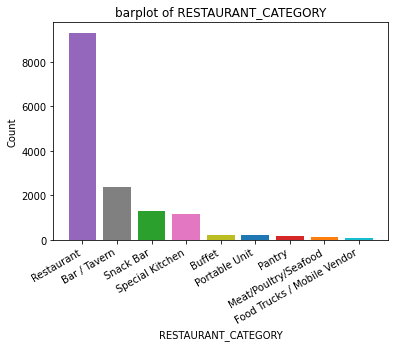

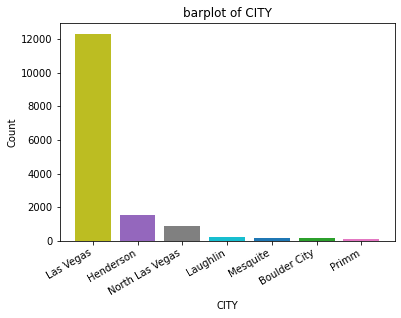

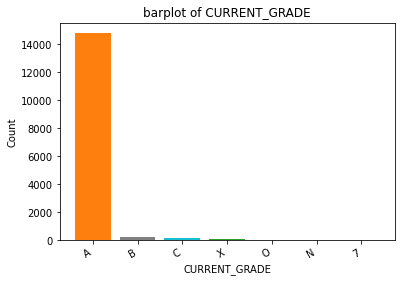

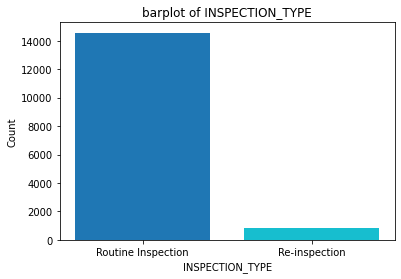

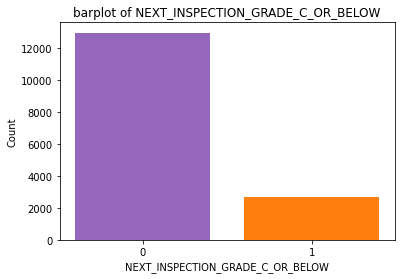

In [19]:
def countplot_(selected_feature, cols):

    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#e377c2', '#bcbd22', '#17becf', 'grey']
    
    plt.bar(x = df_EDA[selected_feature].value_counts()[:cols].index , 
              height = df_EDA[selected_feature].value_counts()[:cols], 
                 color = np.random.choice(colors, cols, replace=False) )
    if cols> 5:
      plt.xticks(rotation=30, ha='right')
    else: 
        pass
    plt.xlabel(selected_feature)
    plt.ylabel('Count')
    plt.title('barplot of'+' '+selected_feature)
    plt.show()

selected_features_dict = {'RESTAURANT_CATEGORY':9 , 'CITY':7 , 'CURRENT_GRADE':7 , 'INSPECTION_TYPE':2 ,
                      'NEXT_INSPECTION_GRADE_C_OR_BELOW':2}

for key in selected_features_dict:
        countplot_(key, selected_features_dict[key])


*   Note: 
some features like: `RESTAURANT_SERIAL_NUMBER`, `RESTAURANT_PERMIT_NUMBER`, `RESTAURANT_NAME`, `RESTAURANT_LOCATION`, `ADDRESS`, `ZIP`, that were so specific (many unique values with small frequency) and did not have any statiscially useful information, are ignored from exploration.






From figures above we note that: 


*   The majority of values in `RESTAURANT_CATEGORY` fall into *Restaurant* type. \
*   Most of inspections are done in *Las Vegas*. \
*   Grade *A* is dominant within `CURRENT_GRADE` values. We might be able to remove it in preprocessing section. \
*   The data is **imbalanced**. values with label 0 are dominant in dataset for `NEXT_INSPECTION_GRADE_C_OR_BELOW`. later in preprocessing we need to take care of it.   







*  ### Numeric features distribution:
---

I noticed that the numeric features include a few non-numeric outliers that need to be removed using Pandas `.apply` and `.to_numeric()` built-in functions. Then, `.describe()`is used to find simple statistical results. 


In [70]:
# numeric fields:
numeric_fields = ['CURRENT_DEMERITS', 'EMPLOYEE_COUNT', 'MEDIAN_EMPLOYEE_AGE',
                    'INSPECTION_DEMERITS']
# remove non-numerics:
df_EDA[numeric_fields] = df_EDA[numeric_fields].apply(lambda x: pd.to_numeric(x, errors='coerce')).dropna()

df_EDA.describe().squeeze()

,CURRENT_DEMERITS,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,INSPECTION_DEMERITS,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION
count,15074.000000,15074.000000,1.507400e+04,15376.000000,15074.000000,1.546100e+04,15588.000000,15612.000000
mean,5.245705,22.533037,2.735638e+12,4.030491,29.884569,7.263423e+02,171.871953,179.269088
std,14.034537,907.690787,3.358712e+14,2.022737,1984.705417,6.976831e+04,80.079188,77.347049
min,-8.000000,-7.000000,-3.146213e+00,0.227197,-10.000000,1.000000e+00,2.000000,4.000000
25%,0.000000,8.000000,2.459632e+01,2.551504,8.000000,2.020000e+02,204.000000,209.000000
50%,5.000000,14.000000,2.796984e+01,3.693207,10.000000,2.060000e+02,211.000000,215.000000
75%,8.000000,21.000000,3.141681e+01,5.138718,19.000000,2.110000e+02,215.000000,227.000000
max,1214.000000,111447.000000,4.123700e+16,24.399347,243678.000000,8.675309e+06,302.000000,310.000000


#### Notes: 

*   A few outliers are observed in numeric columns. The minimum values for `CURRENT_DEMERITS`, `EMPLOYEE_COUNT`, `INSPECTION_DEMERITS`, and `MEDIAN_EMPLOYEE_AGE` are less than zero.
*   `FIRST_VIOLATION`, `SECOND_VIOLATION`, and `THIRD_VIOLATION` don't make any informative insights, so they removed. I noticed that they directly extracted from `VIOLATIONS_RAW` colmumn, but still they are incomplete. Besides, the impact of `VIOLATIONS_RAW` is already has taken into account by `INSPECTION_DEMERITS`. Also, by looking at ***Restaurant_Inspection_Violation_Codes.csv*** guidline, I observed that a large value in Violation Code doesn't indicate the severity of that violation. Then keeping `FIRST_VIOLATION`, `SECOND_VIOLATION`, and `THIRD_VIOLATION` not only is not helpful, also harms the model prediction in the future. 



In [30]:
# Cleaning numeric columns from outliers:

CURRENT_DEMERITS_clean= df_EDA[(df_EDA['CURRENT_DEMERITS'] >= 0) & (df_EDA['CURRENT_DEMERITS'] < 40)]['CURRENT_DEMERITS']
EMPLOYEE_COUNT_clean= df_EDA[(df_EDA['EMPLOYEE_COUNT'] >= 1) & (df_EDA['EMPLOYEE_COUNT'] < 50)]['EMPLOYEE_COUNT']
MEDIAN_EMPLOYEE_AGE_clean= df_EDA[(df_EDA['MEDIAN_EMPLOYEE_AGE'] >= 17) & (df_EDA['MEDIAN_EMPLOYEE_AGE'] < 60)]['MEDIAN_EMPLOYEE_AGE']
INSPECTION_DEMERITS_clean= df_EDA[(df_EDA['INSPECTION_DEMERITS'] >= 1) & (df_EDA['INSPECTION_DEMERITS'] < 60)]['INSPECTION_DEMERITS']

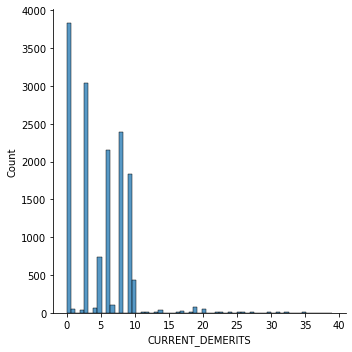

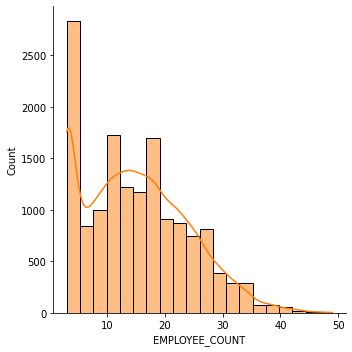

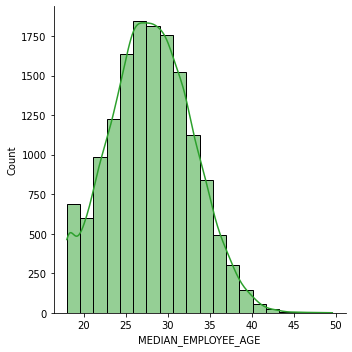

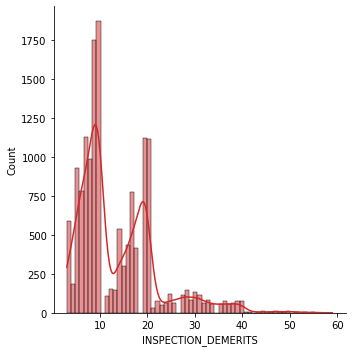

In [34]:
# Plot histograms:

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#e377c2', '#bcbd22', '#17becf', 'grey']
sns.displot(CURRENT_DEMERITS_clean,kde=False, color= colors[0])
plt.show()
sns.displot(EMPLOYEE_COUNT_clean,bins= 20, kde=True, color=colors[1])
plt.show()
sns.displot(MEDIAN_EMPLOYEE_AGE_clean,bins= 20, kde=True, color=colors[2])
plt.show()
sns.displot(INSPECTION_DEMERITS_clean, kde=True, color=colors[3])
plt.show()

The distribution of some features are highly Right-Skewed. 

*  ### Features Selection:
---
The goal is to select atrtributes that best explain the relationship of an independent variable with the target variable. I try to keep the important features with higher correlation with target variable and exclude the reductant ones. 


### Categorical and numerical features analysis:

1- first I barplot the categorical features versus target variable to get a rough sense of target value distribution with respect to each variable \
2- finally, I implement a comprehensive analysis on features by *Chi-Squered test*. 

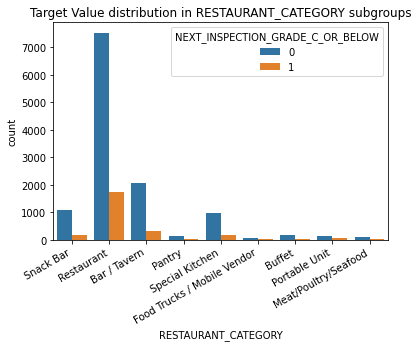

Probability of getting `1` if Restaurant occurs is: 0.1884822389666308
Probability of getting `1` if Bar / Tavern occurs is: 0.12877178070548237
Probability of getting `1` if Snack Bar occurs is: 0.14341387373343725
Probability of getting `1` if Special Kitchen occurs is: 0.15351257588898526
Probability of getting `1` if Buffet occurs is: 0.16666666666666666
Probability of getting `1` if Portable Unit occurs is: 0.23115577889447236
Probability of getting `1` if Pantry occurs is: 0.19393939393939394
Probability of getting `1` if Meat/Poultry/Seafood occurs is: 0.16546762589928057
Probability of getting `1` if Food Trucks / Mobile Vendor occurs is: 0.17346938775510204


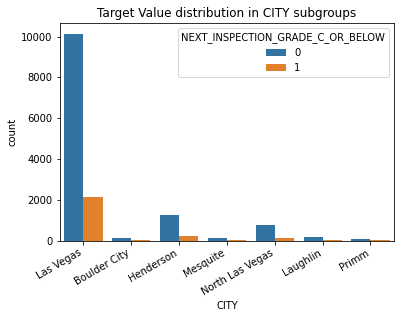

Probability of getting `1` if Las Vegas occurs is: 0.17541010232255969
Probability of getting `1` if Henderson occurs is: 0.15838303512259774
Probability of getting `1` if North Las Vegas occurs is: 0.1627384960718294
Probability of getting `1` if Laughlin occurs is: 0.10256410256410256
Probability of getting `1` if Mesquite occurs is: 0.11320754716981132
Probability of getting `1` if Boulder City occurs is: 0.12878787878787878
Probability of getting `1` if Primm occurs is: 0.1553398058252427


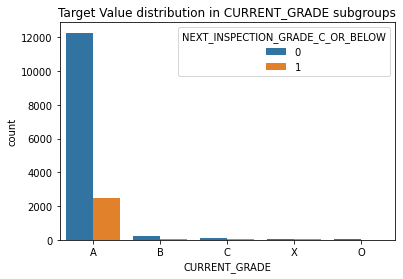

Probability of getting `1` if A occurs is: 0.16918490412629583
Probability of getting `1` if B occurs is: 0.16988416988416988
Probability of getting `1` if C occurs is: 0.2558139534883721
Probability of getting `1` if X occurs is: 0.38666666666666666
Probability of getting `1` if O occurs is: 0.25


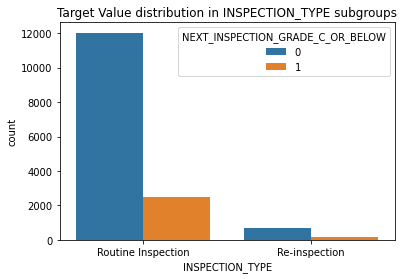

Probability of getting `1` if Routine Inspection occurs is: 0.17198154142847302
Probability of getting `1` if Re-inspection occurs is: 0.17803468208092485


In [64]:
# cat_cols = {'INSPECTION_TYPE': 2, 'CITY': 4}
cat_cols = {'RESTAURANT_CATEGORY':9 , 'CITY':7 , 'CURRENT_GRADE':5 , 'INSPECTION_TYPE':2 }

for key in cat_cols:
      key_elements = df[key].value_counts()[:cat_cols[key]].index
      df_clean = df[df[key].isin(key_elements)]
      df_clean = df_clean[df_clean['NEXT_INSPECTION_GRADE_C_OR_BELOW'].isin(["0","1"])]
      sns.countplot(data=df_clean, x=key, hue='NEXT_INSPECTION_GRADE_C_OR_BELOW')
      if cat_cols[key]> 5:
          plt.xticks(rotation=30, ha='right')
      else: 
         pass
      plt.title('Target Value distribution in'+' '+key+' subgroups')
      plt.show()

      target_groupedby_key = df_clean.groupby([key,
                                        'NEXT_INSPECTION_GRADE_C_OR_BELOW'])['NEXT_INSPECTION_GRADE_C_OR_BELOW'].count()
      for i in range(cat_cols[key]):
            print('Probability of getting `1` if '+key_elements[i]+' occurs is:', 
                                          target_groupedby_key[key_elements[i]][1]/target_groupedby_key[key_elements[i]].sum())

**Note**: \
barplot is used to understand the relationships of  categortical variables with target variable `NEXT_INSPECTION_GRADE_C_OR_BELOW`. However, as it is shown sometimes barplot is not clear enough in this case to show the 0/1 proportions with respect to these variable. In this case, I calculated the probability of getting `1` as target value with respect to each of subgroups of a group to showcase the most imporant groups. However, as results show the probablities of `1` occurance in subgroups of `INSPECTION_TYPE`, `CITY`, and `RESTAURANT_CATEGORY` is almost the same that indicates **None of these variable has strong relationship with `NEXT_INSPECTION_GRADE_C_OR_BELOW` output.**  \
**Important**: \
The results reveal that a restraunt which has been closed in previous inspection has a greater chance to be receive a  grade C or lower. However, since the number of grade A is dominant and grade X is so small, its impact on prediction task will be negligible as well.

In [123]:
def EDA_DataProcessing(df):

    # drop redundant features:
    df = df.drop(['RESTAURANT_SERIAL_NUMBER', 'RESTAURANT_PERMIT_NUMBER', 'RESTAURANT_NAME', 'RESTAURANT_LOCATION', 
                       'ADDRESS', 'STATE', 'ZIP', 'VIOLATIONS_RAW', 'RECORD_UPDATED', 'LAT_LONG_RAW', 'INSPECTION_TIME',
                              'MEDIAN_EMPLOYEE_AGE'], axis=1, inplace = False)
    # data cleaning:
    df = df[df['NEXT_INSPECTION_GRADE_C_OR_BELOW'].isin(["0", "1"])]  
    df= df[(df['CURRENT_DEMERITS'] >= 0) & (df['CURRENT_DEMERITS'] < 40)]
    df = df[(df['EMPLOYEE_COUNT'] > 0) & (df['EMPLOYEE_COUNT'] < 100)]  
    df['INSPECTION_DEMERITS'] = df['INSPECTION_DEMERITS'].apply(lambda x: pd.to_numeric(x, errors='coerce'))
    df = df[(df['INSPECTION_DEMERITS'] >= 1) & (df['INSPECTION_DEMERITS'] < 60)]
    df['NUMBER_OF_VIOLATIONS'] = df['NUMBER_OF_VIOLATIONS'].apply(lambda x: pd.to_numeric(x, errors='coerce'))
    df.dropna(axis = 0, inplace = True)

    # Modify dtypes
    df = df.astype({'CURRENT_DEMERITS':'int64', 'EMPLOYEE_COUNT':'int64' , 'NUMBER_OF_VIOLATIONS':'int64' , 
                       'NEXT_INSPECTION_GRADE_C_OR_BELOW':'int64' })
    return df

df_clean = EDA_DataProcessing(df)

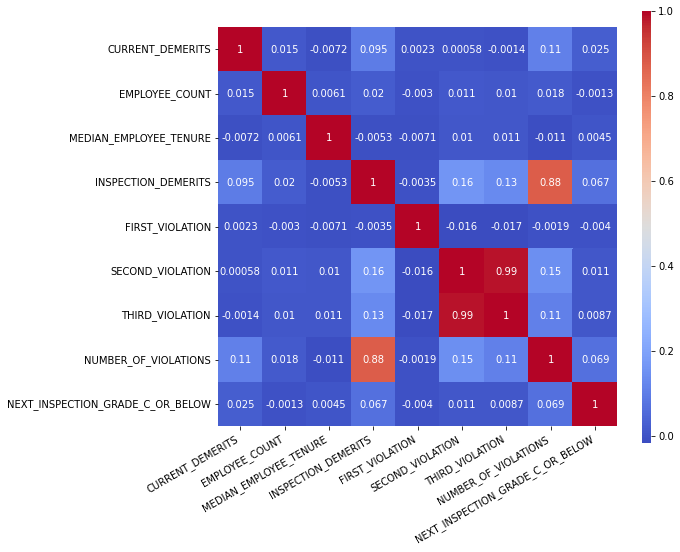

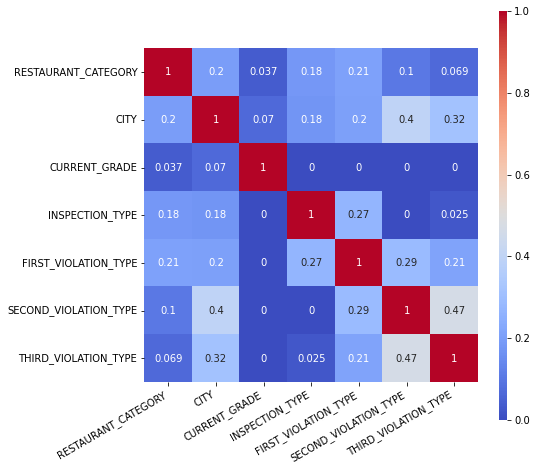

In [128]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(data=df_clean.corr(),
            annot=True, cmap='coolwarm', cbar_kws={'aspect': 50},
            square=True, ax=ax)
plt.xticks(rotation=30, ha='right');
plt.tight_layout()
plt.show()
from scipy.stats import chi2_contingency
def cramers_corrected_stat(contingency_table):
    
    try:
        chi2 = chi2_contingency(contingency_table)[0]
    except ValueError:
        return np.NaN

    n = contingency_table.sum().sum()
    phi2 = chi2/n
    r, k = contingency_table.shape
    r_corrected = r - (((r-1)**2)/(n-1))
    k_corrected = k - (((k-1)**2)/(n-1))
    phi2_corrected = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    return (phi2_corrected / min( (k_corrected-1), (r_corrected-1)))**0.5

def categorical_corr_matrix(df):

    df = df.select_dtypes(include='object')
    cols = df.columns
    n = len(cols)
    corr_matrix = pd.DataFrame(np.zeros(shape=(n, n)), index=cols, columns=cols)
    
    excluded_cols = list()
    for col1 in cols:
        for col2 in cols:
            if col1 == col2:
                corr_matrix.loc[col1, col2] = 1
                break
            df_crosstab = pd.crosstab(df[col1], df[col2], dropna=False)
            corr_matrix.loc[col1, col2] = cramers_corrected_stat(df_crosstab)
                
    # Flip and add to get full correlation matrix
    corr_matrix += np.tril(corr_matrix, k=-1).T
    return corr_matrix

fig, ax = plt.subplots(figsize=(8, 7))
sns.heatmap(categorical_corr_matrix(df_clean), annot=True, cmap='coolwarm', 
            cbar_kws={'aspect': 50}, square=True, ax=ax)
plt.xticks(rotation=30, ha='right');
plt.tight_layout()
plt.show()

The heatmap results of Chi-Squared hypothesis test and Pearson correlation matrix are in accordance with my previous notion. As both heatmaps show there is a very weak correlation between features variables and target value. This will bother us later in the prediction task.  



# **Data Preprocessing**


The data is processed to be compatible with machine learning models' input. \
This section include **four main** tasks:


*   **Data cleaning:** it includes droping useless features based on EDA results, removing outliers and missing values.
*   **Binning:** descritizing continuoues features into distinct bins.
*   **Encoding:** create dummy variables for categorical features. becasue many of machine learning techniques just understand numeric values, expect tree-based algorithms that work with both.
*   **Handling imbalance target:** as discuessed in EDA section, the dataset is imbalance with respect to target value(number of `1` is much less than `0`) which deteriorates the overal efficency of the model. I used an under_sampling technique to make it balance.  










In [130]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, GridSearchCV

cleaned dataset size: (12223, 6)
cleaned label size: (12223, 1)


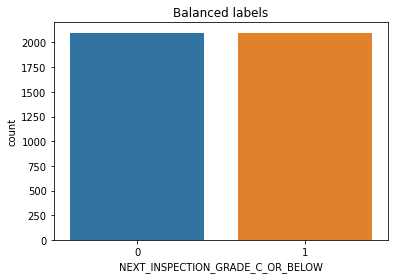

In [202]:
def Data_Preprocessing(df):

        # drop redundant features:
        df= df.drop(['RESTAURANT_SERIAL_NUMBER', 'RESTAURANT_PERMIT_NUMBER', 'RESTAURANT_NAME', 'RESTAURANT_LOCATION', 
                  'ADDRESS', 'CITY', 'STATE', 'CURRENT_GRADE', 'INSPECTION_TIME', 'INSPECTION_TYPE', 'VIOLATIONS_RAW',
                    'RECORD_UPDATED', 'LAT_LONG_RAW', 'FIRST_VIOLATION', 'SECOND_VIOLATION', 'THIRD_VIOLATION',
                      'FIRST_VIOLATION_TYPE', 'SECOND_VIOLATION_TYPE', 'THIRD_VIOLATION_TYPE', 'ZIP', 'RESTAURANT_CATEGORY'], axis=1, inplace = False)
        
        # data cleaning:
        df = df[df['NEXT_INSPECTION_GRADE_C_OR_BELOW'].isin(["0", "1"])]  
        df= df[(df['CURRENT_DEMERITS'] >= 0) & (df['CURRENT_DEMERITS'] < 40)]
        df = df[(df['EMPLOYEE_COUNT'] > 0) & (df['EMPLOYEE_COUNT'] < 100)]  
        df['INSPECTION_DEMERITS'] = df['INSPECTION_DEMERITS'].apply(lambda x: pd.to_numeric(x, errors='coerce'))
        df = df[(df['INSPECTION_DEMERITS'] >= 1) & (df['INSPECTION_DEMERITS'] < 60)]
        df['NUMBER_OF_VIOLATIONS'] = df['NUMBER_OF_VIOLATIONS'].apply(lambda x: pd.to_numeric(x, errors='coerce'))
        df['MEDIAN_EMPLOYEE_AGE'] = df['MEDIAN_EMPLOYEE_AGE'].apply(lambda x: pd.to_numeric(x, errors='coerce'))
        df = df[(df['MEDIAN_EMPLOYEE_AGE'] >= 10) & (df['MEDIAN_EMPLOYEE_AGE'] < 50)]
        df= df.dropna(axis = 0, inplace = False)

        df = df.astype({'CURRENT_DEMERITS':'int64', 'EMPLOYEE_COUNT':'int64' , 'MEDIAN_EMPLOYEE_AGE':'float64' , 'NUMBER_OF_VIOLATIONS':'int64' , 
                               'NEXT_INSPECTION_GRADE_C_OR_BELOW':'int64' })
        # binning: 
        bins_TENURE = [0.1, 3, 7, 17]
        df['MEDIAN_EMPLOYEE_TENURE'] = pd.cut(df['MEDIAN_EMPLOYEE_TENURE'], bins=bins_TENURE, labels = np.arange(3))
        bins_AGE = [18, 24, 30, 50]
        df['MEDIAN_EMPLOYEE_AGE'] = pd.cut(df['MEDIAN_EMPLOYEE_AGE'], bins=bins_AGE, labels = np.arange(3))
        bins_EMP_COUNT = [3, 10, 20, 55]
        df['EMPLOYEE_COUNT'] = pd.cut(df['EMPLOYEE_COUNT'], bins=bins_EMP_COUNT, labels = np.arange(3))

        # Categorical feature encoding :
        # cat_features_list = ['RESTAURANT_CATEGORY']
        # df= pd.get_dummies(data=df, columns= cat_features_list , drop_first=True).dropna()
        df = df.dropna()

        # separate train features from labels.
        # first shuffle the dataset
        df = shuffle(df)
        df_X = df.drop(['NEXT_INSPECTION_GRADE_C_OR_BELOW'], axis = 1)
        label = df[['NEXT_INSPECTION_GRADE_C_OR_BELOW']]
        print('cleaned dataset size:', df_X.shape)
        print('cleaned label size:', label.shape)


        # Instantiate Random Under Sampler
        rus = RandomUnderSampler(random_state=42)
        # Perform random under-sampling
        df_train_vali, df_y = rus.fit_resample(df_X, label)
        X_train, X_validation, y_train, y_validation = train_test_split(df_train_vali, df_y, test_size = 0.2,  
                                                                            random_state = 18, shuffle=True)
        # Visualize new classes distributions
        sns.countplot(data = df_y, x = 'NEXT_INSPECTION_GRADE_C_OR_BELOW')
        plt.title('Balanced labels')
        plt.show()

        return X_train, X_validation, y_train, y_validation

df_Preprocessing = df 
X_train, X_validation, y_train, y_validation = Data_Preprocessing(df_Preprocessing)

# **Models prediction**


---

### Models:  

In [179]:
# Import required library for modeling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, log_loss

### K-Neighbors Classifier:

*Cross-validation* and *hyperparameters tuning (Grid Search)* techniques are implemented to guarantee the optimal results at the cost of time.  

In [ ]:
# KNeighborsClassifier

#List Hyperparameters that we want to tune.
leaf_size = [3, 5, 10]
n_neighbors = [3, 5 , 7, 9]
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create KNN object
knn = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn, hyperparameters, cv=5,  scoring = 'f1_micro')
#Fit the model
best_model_KNeighborsClassifier = clf.fit(X_train, y_train)

In [183]:
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model_KNeighborsClassifier.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model_KNeighborsClassifier.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model_KNeighborsClassifier.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 3
Best p: 1
Best n_neighbors: 3


In [184]:
#Predict on validation data set.
y_pred = best_model_KNeighborsClassifier.predict(X_validation)
acc = accuracy_score(y_pred, y_validation)
print("Accuracy: {:.4%}".format(acc))
print(confusion_matrix(y_pred, y_validation))
#Checking performance our model with classification report.
print(classification_report(y_pred, y_validation))
#Checking performance our model with ROC Score.
# roc_auc_score(y_test, y_pred)

Accuracy: 51.7857%
[[218 194]
 [211 217]]
              precision    recall  f1-score   support

           0       0.51      0.53      0.52       412
           1       0.53      0.51      0.52       428

    accuracy                           0.52       840
   macro avg       0.52      0.52      0.52       840
weighted avg       0.52      0.52      0.52       840



### Logistic Regression Classifier:
*Cross-validation* and *hyperparameters tuning (Grid Search)* techniques are implemented to guarantee the optimal results at the cost of time.  

In [ ]:
#List Hyperparameters that we want to tune.
solver = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['none', 'l1', 'l2']
C = [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]

#Convert to dictionary
hyperparameters = dict(solver=solver, penalty=penalty, C= C)
#Create Logistic Regression object
LogReg = LogisticRegression()
#Use GridSearch
clf = GridSearchCV(LogReg, hyperparameters, cv=5,  scoring = 'f1_micro')
#Fit the model
best_model_LogReg = clf.fit(X_train, y_train)

In [186]:
#Print The value of best Hyperparameters
print('Best solver:', best_model_LogReg.best_estimator_.get_params()['solver'])
print('Best penalty:', best_model_LogReg.best_estimator_.get_params()['penalty'])
print('Best C:', best_model_LogReg.best_estimator_.get_params()['C'])

Best solver: newton-cg
Best penalty: l2
Best C: 0.001


In [187]:
#Predict on validation data set.
y_pred = best_model_LogReg.predict(X_validation)
acc = accuracy_score(y_pred, y_validation)
print("Accuracy: {:.4%}".format(acc))
print(confusion_matrix(y_pred, y_validation))
#Checking performance our model with classification report.
print(classification_report(y_pred, y_validation))
#Checking performance our model with ROC Score.
# roc_auc_score(y_test, y_pred)

Accuracy: 54.5238%
[[263 216]
 [166 195]]
              precision    recall  f1-score   support

           0       0.61      0.55      0.58       479
           1       0.47      0.54      0.51       361

    accuracy                           0.55       840
   macro avg       0.54      0.54      0.54       840
weighted avg       0.55      0.55      0.55       840



### Random Forest Classifier:
*Cross-validation* and *hyperparameters tuning (Grid Search)* techniques are implemented to guarantee the optimal results at the cost of time.  

In [ ]:
#Dict of Hyperparameters that we want to tune:
hyperparameters = { 
    'n_estimators': [300,400,500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [35, 50],
    'criterion' :['gini', 'entropy'],
    'random_state' : [18]
}

#Create Logistic Regression object
RF = RandomForestClassifier()
#Use GridSearch
clf = GridSearchCV(RF, hyperparameters, cv=5,  scoring = 'f1_micro')
#Fit the model
best_model_RF = clf.fit(X_train, y_train)

In [189]:
#Print The value of best Hyperparameters
print('Best n_estimators:', best_model_RF.best_estimator_.get_params()['n_estimators'])
print('Best max_features:', best_model_RF.best_estimator_.get_params()['max_features'])
print('Best max_depth:', best_model_RF.best_estimator_.get_params()['max_depth'])
print('Best criterion:', best_model_RF.best_estimator_.get_params()['criterion'])

Best n_estimators: 500
Best max_features: sqrt
Best max_depth: 35
Best criterion: gini


In [190]:
#Predict on validation data set.
y_pred = best_model_RF.predict(X_validation)
acc = accuracy_score(y_pred, y_validation)
print("Accuracy: {:.4%}".format(acc))
print(confusion_matrix(y_pred, y_validation))
#Checking performance our model with classification report.
print(classification_report(y_pred, y_validation))
#Checking performance our model with ROC Score.
# roc_auc_score(y_test, y_pred)

Accuracy: 48.4524%
[[209 213]
 [220 198]]
              precision    recall  f1-score   support

           0       0.49      0.50      0.49       422
           1       0.48      0.47      0.48       418

    accuracy                           0.48       840
   macro avg       0.48      0.48      0.48       840
weighted avg       0.48      0.48      0.48       840



### The trained model prediction on test data:

In [222]:
# Script that parses csv file into dataframe
df_test = pd.read_csv("/content/drive/MyDrive/Job internship/TEST_SET_2022.csv")
print('size of dataset (records, fields):', df_test.shape)
df_test.head(3)

size of dataset (records, fields): (7505, 27)


,RESTAURANT_SERIAL_NUMBER,RESTAURANT_PERMIT_NUMBER,RESTAURANT_NAME,RESTAURANT_LOCATION,RESTAURANT_CATAGORY,ADDRESS,CITY,STATE,ZIP,CURRENT_DEMERITS,...,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE
0,DA1050454,PR0022396,TE PUB EXHIB KITCHEN,TE PUB @ CRYSTALS,Special Kitchen,3720 S LAS VEGAS,Las Vegas,Nevada,89158,6,...,209.0,213,217,Critical,Major,Major,5,3.000000,31.141933,3.542119
1,DA0986444,PR0014531,Plaza Hotel Showroom Bar,Plaza Hotel & Casino,Bar / Tavern,1 S Main St,Las Vegas,Nevada,89101-6370,0,...,214.0,222,227,Major,Major,Non-Major,4,18.598406,26.839893,4.885881
2,DA1284914,PR0014520,Plaza Hotel Race & Sportsbook Bar,Plaza Hotel & Casino,Bar / Tavern,1 S Main St,Overton,Nevada,89101-6370,8,...,211.0,212,213,Major,Major,Major,6,5.730357,31.202256,1.883055


In [226]:
def Data_Preprocessing_test(df):

        # drop redundant features:
        df= df.drop(['RESTAURANT_PERMIT_NUMBER', 'RESTAURANT_NAME', 'RESTAURANT_LOCATION', 
                  'ADDRESS', 'CITY', 'STATE', 'current_grade', 'INSPECTION_TIME', 'INSPECTION_TYPE', 'VIOLATIONS_RAW',
                    'RECORD_UPDATED', 'LAT_LONG_RAW', 'FIRST_VIOLATION', 'SECOND_VIOLATION', 'THIRD_VIOLATION',
                      'FIRST_VIOLATION_TYPE', 'SECOND_VIOLATION_TYPE', 'THIRD_VIOLATION_TYPE', 'ZIP', 'RESTAURANT_CATAGORY'], axis=1, inplace = False)
        
        # data cleaning:
        df= df[(df['CURRENT_DEMERITS'] >= 0) & (df['CURRENT_DEMERITS'] < 40)]
        df = df[(df['EMPLOYEE_COUNT'] > 0) & (df['EMPLOYEE_COUNT'] < 100)]  
        df['INSPECTION_DEMERITS'] = df['INSPECTION_DEMERITS'].apply(lambda x: pd.to_numeric(x, errors='coerce'))
        df = df[(df['INSPECTION_DEMERITS'] >= 1) & (df['INSPECTION_DEMERITS'] < 60)]
        df['NUMBER_OF_VIOLATIONS'] = df['NUMBER_OF_VIOLATIONS'].apply(lambda x: pd.to_numeric(x, errors='coerce'))
        df['MEDIAN_EMPLOYEE_AGE'] = df['MEDIAN_EMPLOYEE_AGE'].apply(lambda x: pd.to_numeric(x, errors='coerce'))
        df = df[(df['MEDIAN_EMPLOYEE_AGE'] >= 10) & (df['MEDIAN_EMPLOYEE_AGE'] < 50)]
        df= df.dropna(axis = 0, inplace = False)

        df = df.astype({'CURRENT_DEMERITS':'int64', 'EMPLOYEE_COUNT':'int64' , 'MEDIAN_EMPLOYEE_AGE':'float64' , 'NUMBER_OF_VIOLATIONS':'int64' })
        # binning: 
        bins_TENURE = [0.1, 3, 7, 17]
        df['MEDIAN_EMPLOYEE_TENURE'] = pd.cut(df['MEDIAN_EMPLOYEE_TENURE'], bins=bins_TENURE, labels = np.arange(3))
        bins_AGE = [18, 24, 30, 50]
        df['MEDIAN_EMPLOYEE_AGE'] = pd.cut(df['MEDIAN_EMPLOYEE_AGE'], bins=bins_AGE, labels = np.arange(3))
        bins_EMP_COUNT = [3, 10, 20, 55]
        df['EMPLOYEE_COUNT'] = pd.cut(df['EMPLOYEE_COUNT'], bins=bins_EMP_COUNT, labels = np.arange(3))

        df_X = df.dropna()

        return df_X

X_test = Data_Preprocessing_test(df_test)

In [ ]:
# Prediction on test set:

RESTAURANT_SERIAL_NUM = X_test[['RESTAURANT_SERIAL_NUMBER']]
X_test = X_test.drop(['RESTAURANT_SERIAL_NUMBER'], axis = 1)


In [ ]:
y_test_pred = best_model_LogReg.predict(X_test).reshape(-1,1)
Y_predict_probab  = best_model_LogReg.predict_proba(X_test)  
Y_predict_probability =Y_predict_probab[:,1].reshape(-1,1)
RESTAURANT_SERIAL_NUM = np.array(RESTAURANT_SERIAL_NUM).reshape(-1,1)

In [251]:
Prediction = np.append(RESTAURANT_SERIAL_NUM, Y_predict_probability, axis=1)
Prediction = np.append(Prediction, y_test_pred, axis=1)
print(Prediction)

[['DA0986444' 0.4356261983063771 0]
 ['DA1284914' 0.4996537916990371 0]
 ['DA1281903' 0.5203891606705 1]
 ...
 ['DA0633450' 0.49084515107093857 0]
 ['DA0998980' 0.45472102094324857 0]
 ['DA0831126' 0.5073976221997664 1]]
